# OBJECTIVE:

To predict the survival chances of patients who had undergone breast surgery for a period of 5 years and above depending on given featues

(Breast Surgery may possibly mean removal of lymph nodes as well as tumor)

surv status=1 if the patient survived for more than 5 years after the surgery

surv status=2 if the patient died within 5 years after the surgery



References:
1)Jupyter notebook by verma sir on EDA.

2)https://towardsdatascience.com/exploratory-data-analysis-habermans-cancer-survival-dataset-c511255d62cb?

# Load the data and import the useful libraries

In [2]:
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 
import numpy as np
import matplotlib.pyplot as plt


cancer=pd.read_csv("haberman.csv")



# find the shape of the dataset

In [11]:
cancer.shape

(306, 4)

# Observations
the dataset has a total of 306 rows and 4 features

# what are the columns/features in the dataset?

In [13]:
print(cancer.columns)

Index(['age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')


# Looking at the data

In [14]:
print(cancer.head())

   age  Op_Year  axil_nodes  Surv_status
0   30       64           1            1
1   30       62           3            1
2   30       65           0            1
3   31       59           2            1
4   31       65           4            1


# observation

more axil nodes indicate less chance of survival/more presence of cancer. hece it can be an useful feature

# find the counts for each class

In [15]:
print(cancer["Surv_status"].value_counts())

1    225
2     81
Name: Surv_status, dtype: int64


# observations

1) its an imbalanced dataset.

2)73.7 Percent of the dataset belongs to class 1 whereas only 26.3 percent belongs to class 2 .

# Percentages of patients for each class

In [24]:
x=225/306
y=1-x
print(x,y)

0.7352941176470589 0.2647058823529411


# observation
73.5% of the  total patients survived for more than 5 years after the surgery.
26.4% of the total patients died within 5 years after the surgery.

# 2-D Scatter Plot

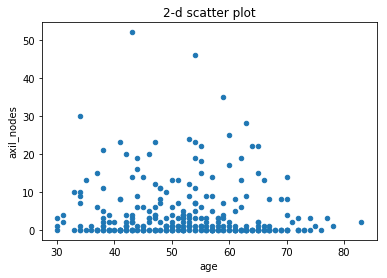

In [3]:
cancer.plot(kind='scatter',x='age',y='axil_nodes')
plt.title('2-d scatter plot')
plt.show()

# observations

1)dataset is mixed.

2)cant infer any information from the above plot.

# 2-d scatter plot using Seaborn 

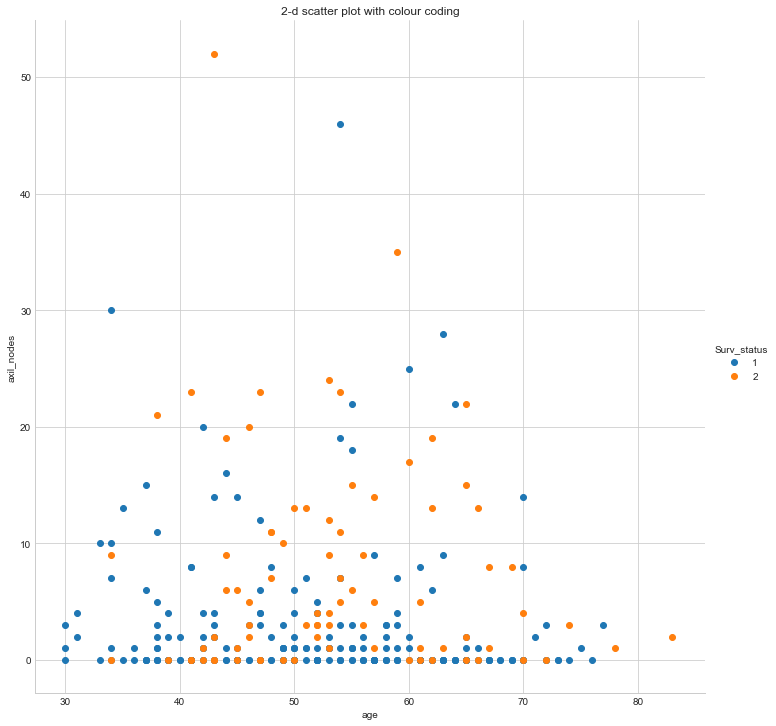

In [4]:
plt.close()
import seaborn as sns
sns.set_style('whitegrid')
sns.FacetGrid(cancer,hue='Surv_status',size=10)\
    .map(plt.scatter,'age','axil_nodes')\
    .add_legend()
plt.title('2-d scatter plot with colour coding')
plt.show()


# observations

1)patients between the age groups of 30 to 40 have more chances of survival.

2)as the number of axil nodes increase, the chances of survival is decreasing.

3)for the age group of 30 to 40 years with 0 or less than 10 nodes, the patients have actually survived for more than 5 years.

4)for the age group 50 to 70 with the increase in the number of axil nodes greater than 1 to 30, more patients have not survived for more than 5 years after the surgery.

# Pair-plot

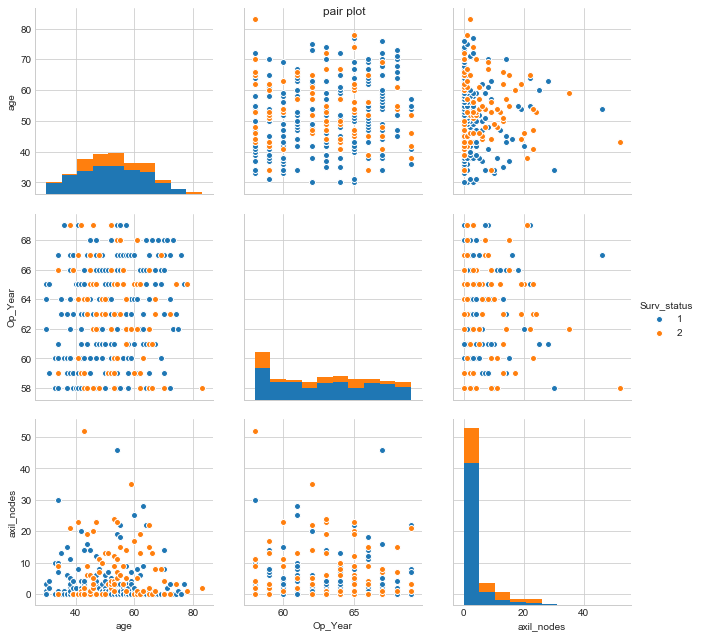

In [10]:
plt.close();
sns.set_style("whitegrid");
y=sns.pairplot(cancer, hue="Surv_status",vars=['age','Op_Year','axil_nodes'] ,size=3);
y.fig.suptitle('pair plot')
plt.show()

# Observations

1)from the above PDF's ,we can say that there is a lot of overlapping of the 2 classes.

2)lets plot PDF of each feature individually.

# UNI VARIATE ANALYSIS (AGE)

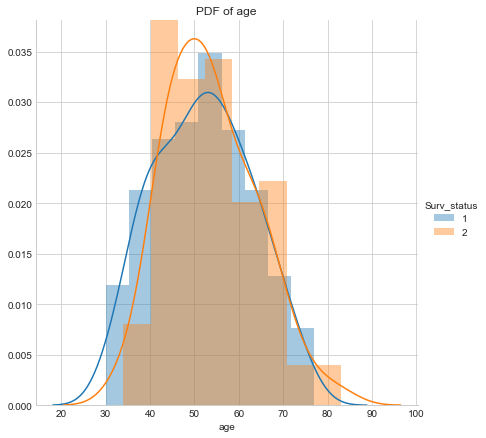

In [11]:
sns.FacetGrid(cancer,hue='Surv_status',size=6)\
    .map(sns.distplot,'age')\
    .add_legend()
plt.title('PDF of age')
plt.show()


# Observations

1)as the blue line is above the orange line till age=40, more people under that age group(30-40) have survived the surgery for more than 5 years.

2) both the graphs come from similar distributions as the pdf's are almost overlapping.

3)the spread/variance on the blue PDF is more.hence the survived people are more spread accross the dataset.hence we cant seperate the classes effectively.

4)age grp of [50-60]had less chances of survival as the orange line is above the blue line.

5)for the age group above 60 years people had 50-50 chances of survival of both the PDF's are overlapping.

# UNI VARIATE ANALYSIS (Op_Year)

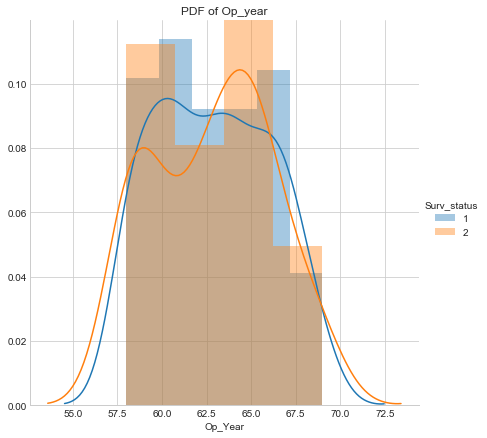

In [12]:
sns.FacetGrid(cancer,hue='Surv_status',size=6)\
    .map(sns.distplot,'Op_Year')\
    .add_legend()
plt.title('PDF of Op_year')
plt.show()

# Observations

1)this PDF can tell us the medical advancements/ trend from 1958 to 1970.as the data collected are from that period of time.

2)we can see that the patients survival chances are less in year 1958.

3)from year 1960 to 1963 the survival chances of patients increased.

4)there is a sharp decline in the survival chances from 1964 to 1967 as the orange line is above the blue line.

5)it doesnot contribute much as it doesnot say much useful information apart from medical trends.

# UNI VARIATE ANALYSIS (axil nodes)

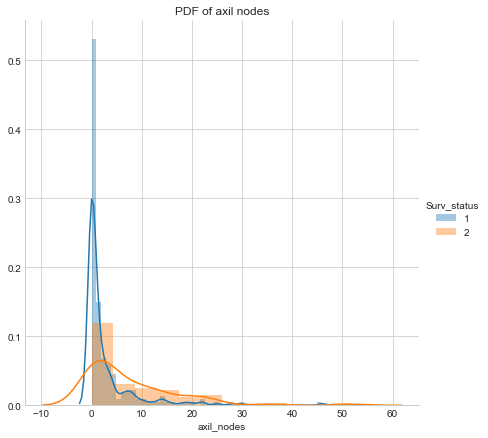

In [13]:
sns.FacetGrid(cancer,hue='Surv_status',size=6)\
    .map(sns.distplot,'axil_nodes')\
    .add_legend()
plt.title('PDF of axil nodes')
plt.show()

# Observations

1)the spread on the blue PDF is very small.

2)most of the points are concentrated near 0 or 1.

3)hence people with atmost 1 axil node have survived for more than 5 years post surgery.

4)as the number of axil nodes is incresing, the chances of survival is less.

5)this can be considered as a useful feature.

# splitting the classes to plot the CDF's of each class individually(class 1)

In [15]:
survived=cancer.loc[cancer['Surv_status']==1] 
print(survived.head())

   age  Op_Year  axil_nodes  Surv_status
0   30       64           1            1
1   30       62           3            1
2   30       65           0            1
3   31       59           2            1
4   31       65           4            1


# splitting the classes to plot the CDF's of each class individually(class 2)

In [16]:
dead=cancer.loc[cancer['Surv_status']==2] 
dead.head()

,age,Op_Year,axil_nodes,Surv_status
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2


# CDF of both class 1 and class 2


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
bins of 2nd CDF
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


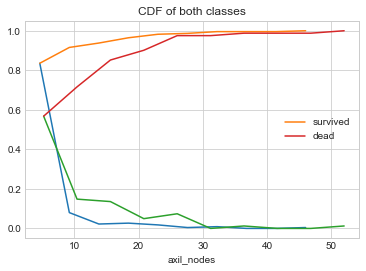

In [17]:
counts1, bin_edges1 = np.histogram(survived['axil_nodes'],bins=10,density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label ='survived')

print('bins of 2nd CDF')
counts2, bin_edges2 = np.histogram(dead['axil_nodes'],bins=10,density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:],pdf2)
plt.plot(bin_edges2[1:],cdf2, label ='dead')
plt.xlabel('axil_nodes')
plt.legend()
plt.title('CDF of both classes')
plt.show()

# observations

1)83.5 % of the patients survived for more than 5 years had axl nodes count of max 4.6

2)the CDF is almost straight after node count of 4.6 indicates there are a very few people who survived with more axil nodes count than 4.6. I.E slope of 
the CDF line is less.

3)56.7 if the patients who died within 5 years had a minimum of 5.2 axil nodes.

4)the slope of the dead patients CDF is more which indicates more the axil nodes= more chances of death after surgery.


# BOX-PLOTS

# 1)Surv status vs age

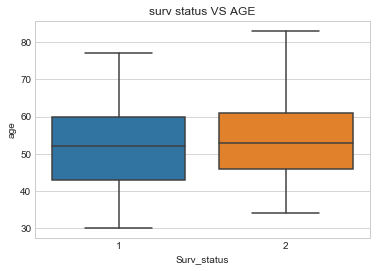

In [21]:
import seaborn as sns
plt.close()
sns.boxplot(x='Surv_status',y='age',data=cancer)
plt.title('surv status VS AGE')
plt.show()

# Observations

1)Width of the IQR of blue plot is greater than that of the orange plot.

2)This indicates that more values are present in that interval when compared to the same interval of the orange plot IQR.

3)25% of the survived people lie between an age of 30 to 43(approx)

4)52 is the median age approximately.

5)about 50% of the patients are aged between 44 and 60.

# 2)Surv status vs Op_year

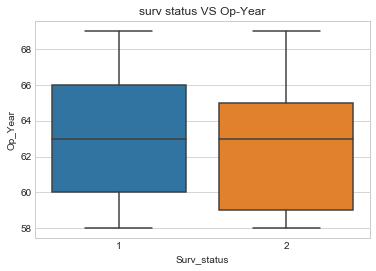

In [22]:
plt.close()
sns.boxplot(x='Surv_status',y='Op_Year',data=cancer)
plt.title('surv status VS Op-Year')
plt.show()

# 3)surv status vs axil nodes

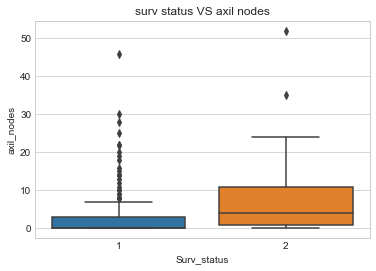

In [23]:
sns.boxplot(x='Surv_status',y='axil_nodes',data=cancer)
plt.title('surv status VS axil nodes')
plt.show()

# observations

1)the width of blue box plot(survived) is less than that of the orange(dead).I.E people who survived had most of the axil nodes in range 0 and 1.

2)about 75% of the people who died had an axil node count between 1 and just above 10 nodes.

# Violin plots

# 1)axil nodes vs surv status

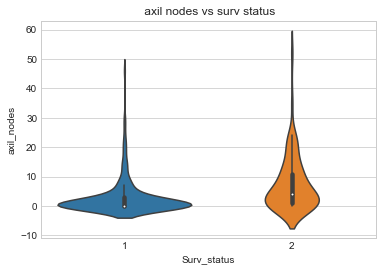

In [24]:

plt.close()
sns.violinplot(x='Surv_status',y='axil_nodes',data=cancer)
plt.title(' axil nodes vs surv status')
plt.show()


# Observations

1)patients with 0 nodes have high chances of survival.

2)patients with more than 1 node have less chances of survival.

3)this feature has some importance.can be considered as an useful feature.

# 2)Age vs surv status

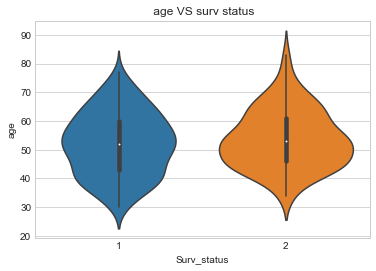

In [26]:
sns.violinplot(x='Surv_status',y='age',data=cancer)
plt.title(' age VS surv status')
plt.show()

# Observations

 1)most of the survived patients are between the age interval of 30 to 55.

2)people also died significantly in the same age interval.(from orange plot)

3)this feature is not that informative.

# 3)Op_year vs Surv status

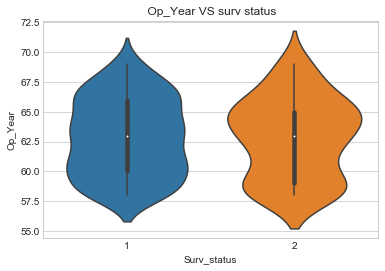

In [27]:
sns.violinplot(x='Surv_status',y='Op_Year',data=cancer)
plt.title(' Op_Year VS surv status')
plt.show()

# Observations

1)the survival chances remains fairly constant from 1960 to 1967

2)but there is an abnormality in the death rate aswell from 1962 to 1965.

3)most people died in the year 1965

3)not an useful feature when compared to age feature.


# contour plot

(age vs axil nodes) and (age vs Op_year)

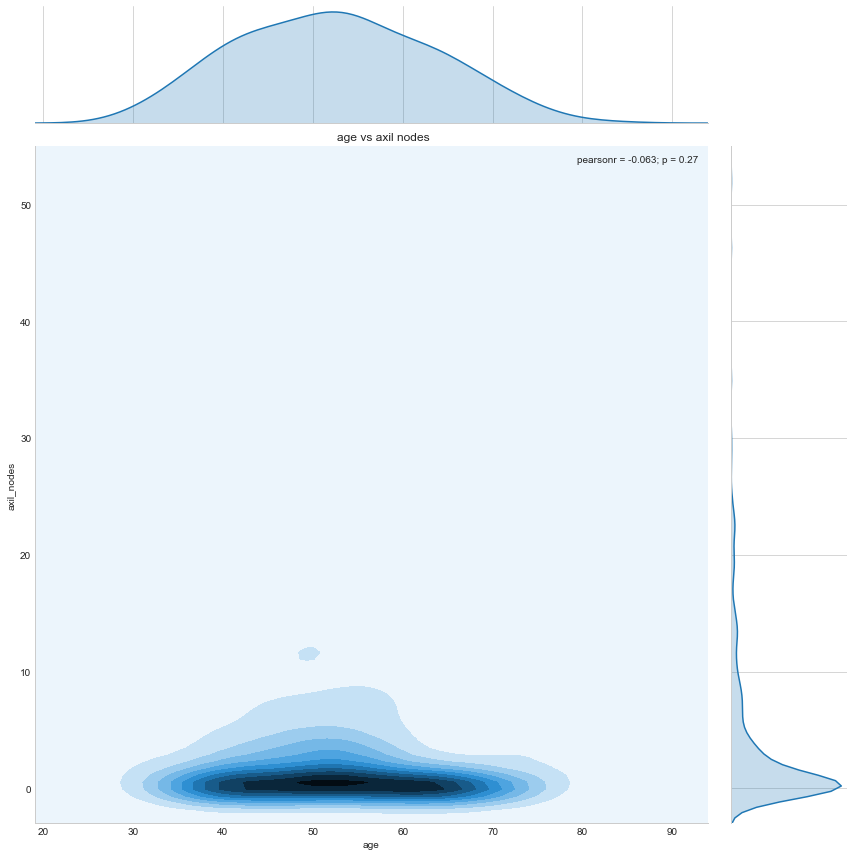

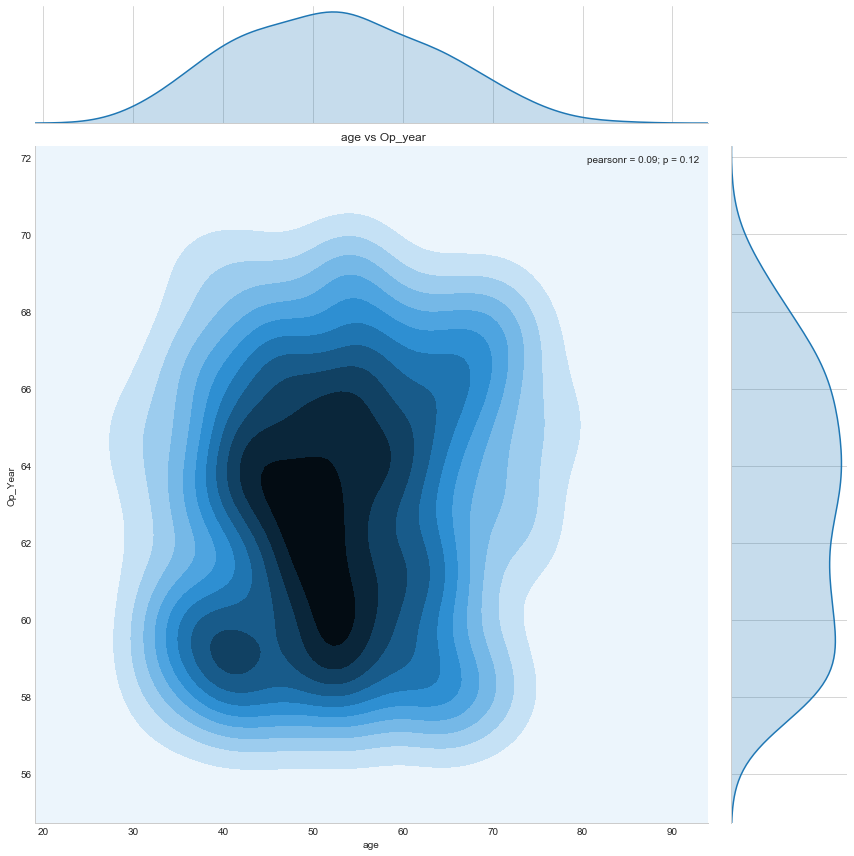

In [37]:
sns.jointplot(x='age',y='axil_nodes',data=cancer,kind='kde',size=12)
plt.title("age vs axil nodes",y=1.0,x=-3)
plt.show()
sns.jointplot(x='age',y='Op_Year',data=cancer,kind='kde',size=12)
plt.title("age vs Op_year",y=1.0,x=-3)
plt.show()

# Observations

1)there is no particular trend between age and  number of axil nodes.

2)but most operations have been performed from 1959 to 1963 .

3)the age group was from 50 to 60 years on which these operations were performed.

# Conclusions

1)axil_node count can be considered as an useful feature.More the nodes less  the chances of survival.

2)Op_year shows the medical trend and advancements in medical technology.however it doesnot follow a consistent trend.

3)as the year advances more people shold survive, but in 1965 more people died.

4)the data is overlapping and imbalanced, hence it is hard to come up with feature importances from basic EDA.

Order:
Axil_nodes>>age>>Op_year